<a href="https://colab.research.google.com/github/dhanrajsurkar123/Arificial-Inteliigence/blob/main/Regressio_with_Keras_(AI_Class_6).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Use case: Build an ANN model that predicts the Power Energy for Powerplant based data. Independent features: sensor readings related to powerplant machines


In [ ]:
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
import pandas as pd
df = pd.read_csv(r'https://raw.githubusercontent.com/sindhura-nk/Datasets/refs/heads/main/PowerPlant.csv')
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43



AT: Atmospheric Temperature V: Vaccum AP: Atmospheric Pressure RH: Relative Humidity PE: Power Energy


## Perform basic data quality

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [ ]:
df.isna().sum()

,0
AT,0
V,0
AP,0
RH,0
PE,0


In [ ]:
df.duplicated().sum()


np.int64(41)

In [ ]:
df=df.drop_duplicates()

**Separate data into X and Y features**

In [ ]:
X =df.drop(columns=['PE'])
y =df[["PE"]]

In [ ]:
X.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [ ]:
y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


**
Data Preprocessing and Data cleaning
**

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [ ]:
num_pipe = make_pipeline(SimpleImputer(strategy='mean'),StandardScaler()).set_output(transform='pandas')

In [ ]:
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

## In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.
**

In [ ]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,AT,V,AP,RH
0,-1.520448,-1.066041,-0.403535,1.141599
1,0.534897,0.330813,-0.309262,0.059223
2,1.354348,0.205475,-1.024725,-2.151400
3,-0.079020,-0.362884,-1.012941,0.236538
4,-1.055645,-1.074713,0.655349,1.633837


**
## Train test split**

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X_pre,y,train_size=0.85,random_state=21)

In [ ]:
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(8097, 4) (1430, 4) (8097, 1) (1430, 1)


** Artificial Neural Network Model Building**

In [ ]:
from keras.models import Sequential
from keras.layers import Input,Dense

In [ ]:
xtrain.shape

(8097, 4)

In [ ]:
xtrain.shape[1]

4

In [ ]:
model = Sequential()

# Add the Input Layer
model.add(Input(shape=(xtrain.shape[1],)))

# Add the Hiden Layer 1
model.add(Dense(units=8,activation='relu'))

# Add the Hidden Layer  2
model.add(Dense(units=4,activation='relu'))

# Add the Output Layer
model.add(Dense(units=1,activation='linear'))

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81 (324.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mse'])

In [ ]:
nn = model.fit(xtrain,ytrain,validation_split=0.2,epochs=40)

Epoch 1/40
203/203 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 206619.1875 - mse: 206619.1875 - val_loss: 205550.8750 - val_mse: 205550.8750
Epoch 2/40
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 203792.0312 - mse: 203792.0312 - val_loss: 198426.9844 - val_mse: 198426.9844
Epoch 3/40
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 193804.0156 - mse: 193804.0156 - val_loss: 175802.6250 - val_mse: 175802.6250
Epoch 4/40
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 167371.1875 - mse: 167371.1875 - val_loss: 138066.8906 - val_mse: 138066.8906
Epoch 5/40
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 129115.3125 - mse: 129115.3125 - val_loss: 97040.8906 - val_mse: 97040.8906
Epoch 6/40
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 91179.9375 - mse: 91179.9375 - val_loss: 65309.2891 - val_mse: 65309.2891
Epoch 7/40
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 60117.0078 - mse: 60117.0078 - val_loss: 44039.0273 - val_mse: 44039.0273
Epoch 8/40
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 3

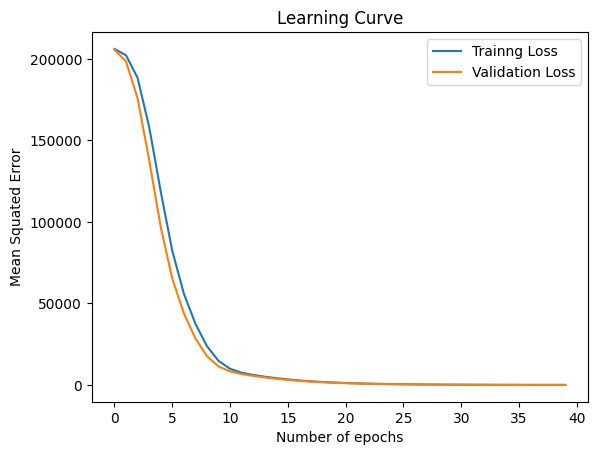

In [ ]:
## Plot the learning curve
import matplotlib.pyplot as plt
plt.plot(nn.history['loss'],label='Trainng Loss')
plt.plot(nn.history['val_loss'],label='Validation Loss')
plt.xlabel("Number of epochs")
plt.ylabel("Mean Squated Error")
plt.legend()
plt.title("Learning Curve")
plt.show()

**Evaluate the model**

In [ ]:
model.evaluate(xtrain,ytrain)

254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 52.4923 - mse: 52.4923


[51.55063247680664, 51.55063247680664]

In [ ]:
model.evaluate(xtest,ytest)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 56.9900 - mse: 56.9900


[53.51079177856445, 53.51079177856445]

In [ ]:
ypred_test = model.predict(xtest)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [ ]:
ypred_train = model.predict(xtrain)

254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mse1 = mean_squared_error(ytrain,ypred_train)
mae1 = mean_absolute_error(ytrain,ypred_train)
r21 = r2_score(ytrain,ypred_train)

print(f"Mean Squared Error:{mse1}")
print(f"Mean Absolute Error:{mae1}")
print(f"R2 Score:{r21}")



Mean Squared Error:51.550636291503906
Mean Absolute Error:5.266977787017822
R2 Score:0.8218144178390503


In [ ]:
mse = mean_squared_error(ytest,ypred_test)
mae = mean_absolute_error(ytest,ypred_test)
r2 = r2_score(ytest,ypred_test)

print(f"Mean Squared Error:{mse}")
print(f"Mean Absolute Error:{mae}")
print(f"R2 Score:{r2}")

Mean Squared Error:53.51078414916992
Mean Absolute Error:5.426761150360107
R2 Score:0.8190826773643494


**Save the model**

In [ ]:
model.save('PEPredictions.keras')

## **Load the model**

In [ ]:
from keras.models import load_model
m = load_model('/content/PEPredictions.keras')
m.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 245 (984.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 164 (660.00 B)

# Generate out of Sample Predictions


In [ ]:
xnew = pd.read_csv(r'https://raw.githubusercontent.com/sindhura-nk/Datasets/refs/heads/main/PowerPlantTest.csv')
xnew

,AT,V,AP,RH
0,25,51.5,1000.1,57.0
1,32,41.0,1051.1,80.0
2,28,NaN,1010.2,NaN


In [ ]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre.head()

,AT,V,AP,RH
0,0.717594,-0.220203,-2.211551,-1.118316
1,1.657948,-1.047911,6.373998,0.456299
2,1.120603,0.000000,-0.511275,0.000000


In [ ]:
PE_preds = m.predict(xnew_pre)
PE_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


array([[444.4031],
       [564.5996],
       [441.1778]], dtype=float32)

In [ ]:
xnew

,AT,V,AP,RH
0,25,51.5,1000.1,57.0
1,32,41.0,1051.1,80.0
2,28,NaN,1010.2,NaN


In [ ]:
xnew["PE predictions"] = PE_preds.round()

In [ ]:
xnew

,AT,V,AP,RH,PE predictions
0,25,51.5,1000.1,57.0,444.0
1,32,41.0,1051.1,80.0,565.0
2,28,NaN,1010.2,NaN,441.0


In [ ]:
xnew['PE predictions'] = xnew['PE predictions'].astype(int).round(2)

In [ ]:
xnew

,AT,V,AP,RH,PE predictions
0,25,51.5,1000.1,57.0,444
1,32,41.0,1051.1,80.0,565
2,28,NaN,1010.2,NaN,441


In [ ]:
xnew.to_csv("Prediction_Results_updated.csv",index=False)